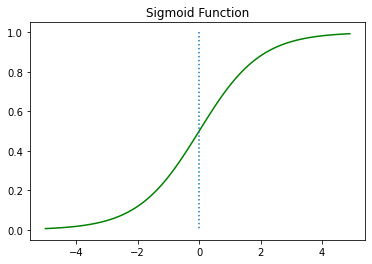

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [8]:
import pandas as pd

from sklearn.datasets import load_breast_cancer

b_cancer = load_breast_cancer()

In [3]:
print(b_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)
b_cancer_df['diagnosis'] = b_cancer.target
b_cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [10]:
b_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

b_cancer_scaled = scaler.fit_transform(b_cancer.data)

pd.DataFrame(b_cancer_scaled, columns = b_cancer.feature_names).tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y=b_cancer_df['diagnosis']  #종속
X=b_cancer_scaled

X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [13]:
lr_b_cancer = LogisticRegression()
lr_b_cancer.fit(X_train, Y_train)
Y_predict = lr_b_cancer.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score, roc_auc_score

confusion_matrix(Y_test, Y_predict)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [15]:
accuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, / 재현율: {2:.3f}, F1 : {3:.3f}'.format(accuracy,precision, recall, f1))

print('ROC_AUC : {0:.3f}'.format(roc_auc))

정확도 : 0.977, 정밀도 : 0.973, / 재현율: 0.991, F1 : 0.982
ROC_AUC : 0.972


In [17]:
feature_name_df = pd.read_csv('./features.txt', sep = '\s+', header = None,names = ['index', 'feature_name'], engine = 'python')
feature_name_df.shape

(561, 2)

In [18]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[0]

'tBodyAcc-mean()-X'

In [22]:
f_name = []
for i, n in enumerate(feature_name):
    f_name.append(n+'_'+str(i))

In [32]:
X_train = pd.read_csv('train/X_train.txt', sep = '\s+', names = f_name, engine = 'python')
X_test = pd.read_csv('test/X_test.txt', sep = '\s+', names = f_name, engine = 'python')
Y_train = pd.read_csv('train/y_train.txt', sep = '\s+', header = None, names = ['action'], engine = 'python')
Y_test = pd.read_csv('test/y_test.txt', sep = '\s+', header = None, names = ['action'], engine = 'python')

In [27]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[0]

'tBodyAcc-mean()-X'

In [28]:
f_name = []
for i, n in enumerate(feature_name):
    f_name.append(n+'_'+str(i))

In [ ]:
X_train = pd.read.